# Mall Customer Segmentation (K-Means Clustering)
This notebook demonstrates customer segmentation using the Mall_Customers dataset.  
The goal is to identify different groups of customers based on their **Annual Income** and **Spending Score**.


In [1]:
#libraries used
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import pandas as pd

## Dataset Overview
The dataset contains 200 customers with the following attributes:
- Gender
- Age
- Annual Income (k$)
- Spending Score (1–100)


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [8]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Exploratory Data Analysis


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

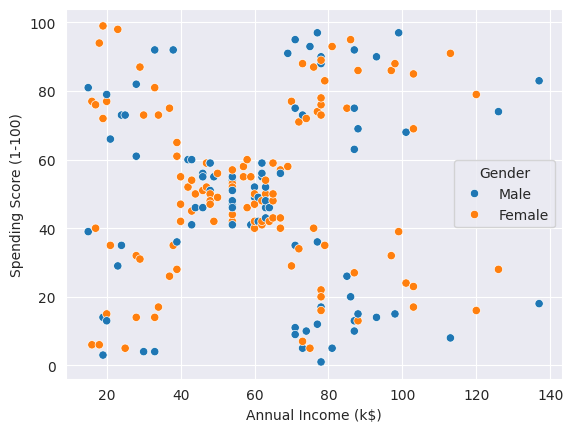

In [13]:
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='Gender')
#annual income vs spending score.
#Gender adds an extra layer, but the real separation is more along income and spending score.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

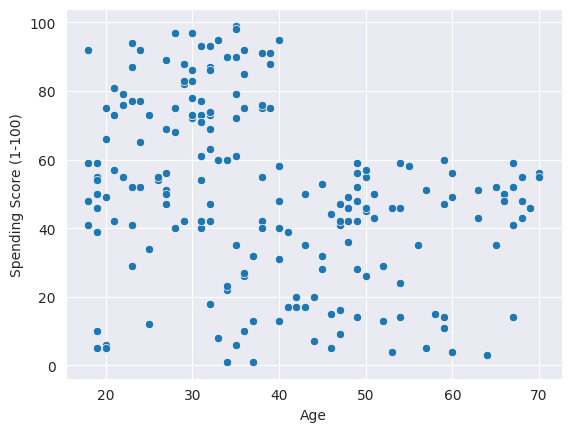

In [147]:
sns.scatterplot(data=mall_df, x='Age', y = 'Spending Score (1-100)')
#age vs spending score

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

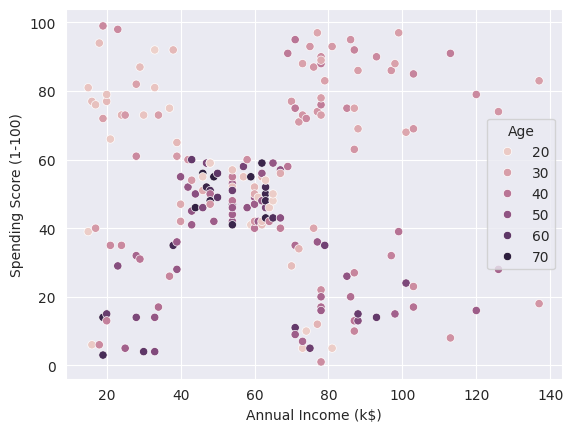

In [17]:
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='Age')
#annual income vs spending score.
#Age adds an extra layer, but the real separation is more along income and spending score.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

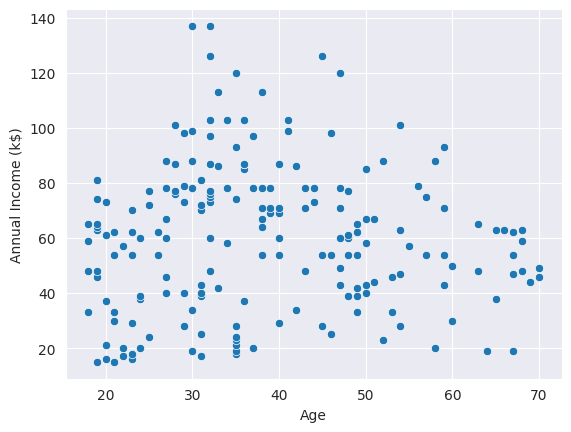

In [22]:
sns.scatterplot(data=mall_df, x='Age', y = 'Annual Income (k$)')
#age vs annual income

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

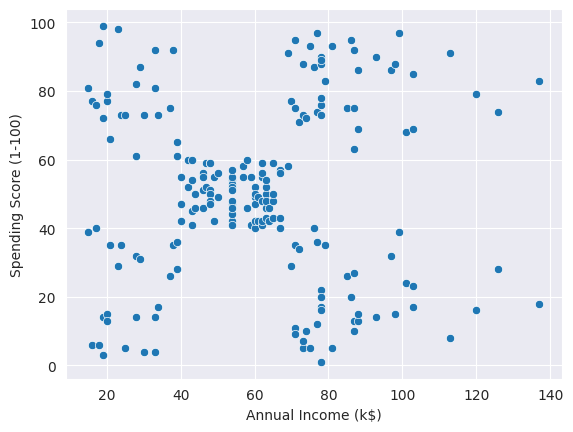

In [23]:
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y = 'Spending Score (1-100)')
#so far, considering the parameters Annual Income and Spending score displays pronounced visual hints of groups

In [52]:
numeric_cols = [ 'Annual Income (k$)', 'Spending Score (1-100)']
x = mall_df[numeric_cols]

In [53]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [54]:
!pip install scikit-learn
from sklearn.cluster import KMeans

we start with 5 clusters

In [130]:
model = KMeans(n_clusters=5, random_state=42)


In [131]:
model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [132]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [133]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [134]:
preds = model.predict(x)
preds

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Below we plot the customer segments.  
Each color represents a different cluster, and blue X marks are the cluster centroids.


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

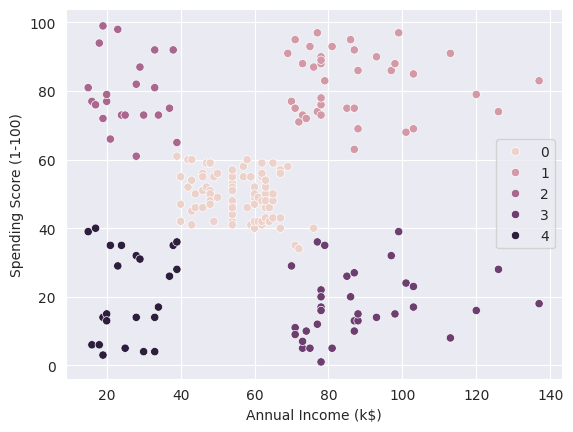

In [135]:
sns.scatterplot(data=x, x='Annual Income (k$)', y = 'Spending Score (1-100)' , hue = preds)

In [136]:
model.inertia_

44448.45544793369

We use the **Elbow Method**, plotting inertia values for different K.
The “elbow” is observed at K=5, meaning 5 clusters are optimal.

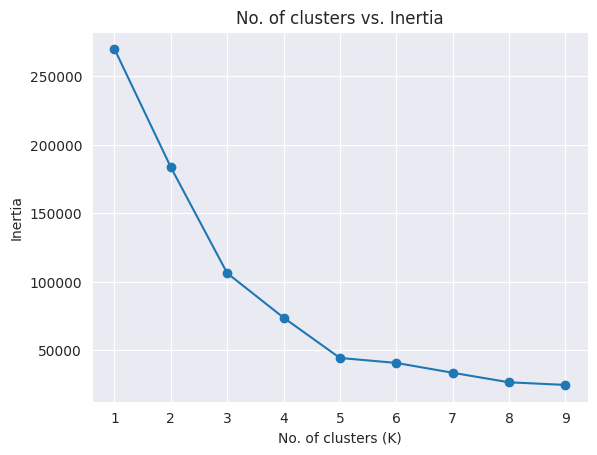

In [137]:
options = range(1,10)
inertias = []

for n_clusters in options:
    km = KMeans(n_clusters, random_state=42).fit(x)
    inertias.append(km.inertia_)


plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');


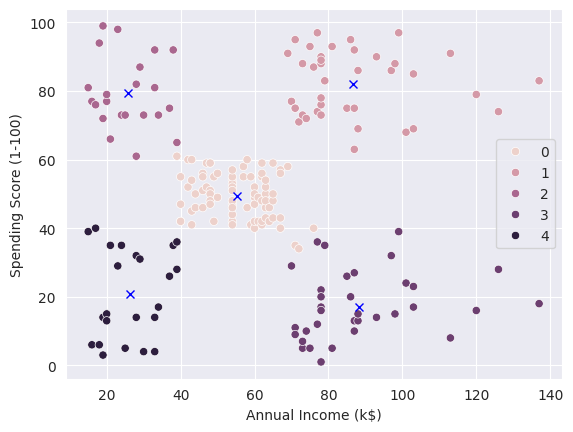

In [138]:
sns.scatterplot(data=x, x='Annual Income (k$)' , y = 'Spending Score (1-100)' , hue = preds)
centers_x,centers_y = model.cluster_centers_[:,0] , model.cluster_centers_[:,1]
plt.plot(centers_x,centers_y,'xb')

## Insights from Clustering
1. High Income, High Spending → VIP customers.
2. High Income, Low Spending → wealthy but conservative.
3. Average Income, Average Spending → general customers.
4. Low Income, High Spending → young shopaholics.
5. Low Income, Low Spending → least profitable group.